## How to Handle Missing Values in the data

Lets load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets load our data set as df

In [2]:
df = pd.read_csv('claimants.csv')
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [3]:
df.shape   # the see total rows and columns

(1340, 7)

In [4]:
df.describe() # This will tell us percentile, count, mean, std, min and max range of the data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [5]:
df.info() # We can also see there are some missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [7]:
df.isnull().sum() # To see missing values by each columns

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [11]:
round((df.isnull().sum() / df.shape[0]*100),2) # To see % of missing values by each column

CASENUM      0.00
ATTORNEY     0.00
CLMSEX       0.90
CLMINSUR     3.06
SEATBELT     3.58
CLMAGE      14.10
LOSS         0.00
dtype: float64

There is around 1% missing value in `CLMSEX` column, 3% in `CLMINSUR` column, 3.58% in `SEATBELT` column and 14.10% in `CLMAGE` column. 
We will transform this data to exclude missing value

Let's visualize our data to understand it better

In [12]:
df.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

<AxesSubplot:xlabel='CLMSEX', ylabel='Count'>

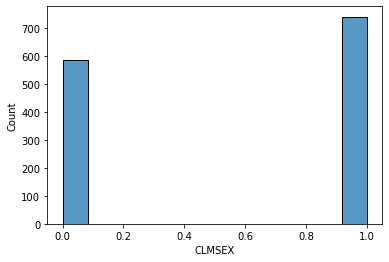

In [14]:
sns.histplot(df['CLMSEX'])

<AxesSubplot:xlabel='CLMAGE', ylabel='Count'>

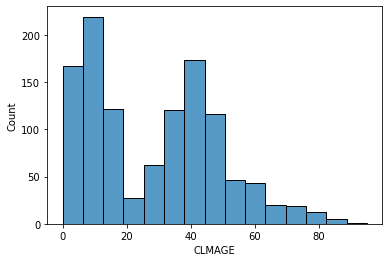

In [15]:
sns.histplot(df['CLMAGE'])

<AxesSubplot:xlabel='CLMINSUR', ylabel='Count'>

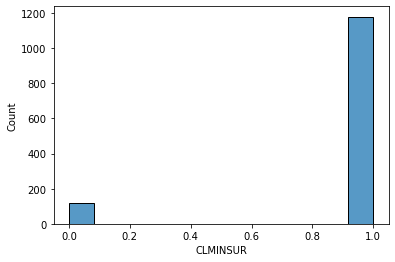

In [27]:
sns.histplot(df['CLMINSUR'])

<AxesSubplot:xlabel='SEATBELT', ylabel='Count'>

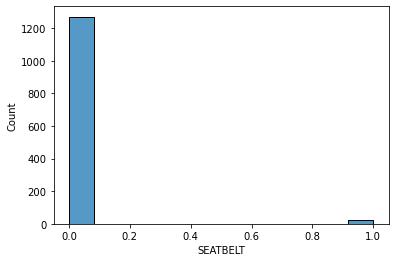

In [16]:
sns.histplot(df['SEATBELT'])

<AxesSubplot:xlabel='ATTORNEY', ylabel='Count'>

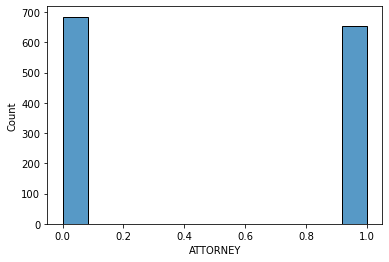

In [17]:
sns.histplot(df['ATTORNEY'])

<AxesSubplot:xlabel='LOSS', ylabel='Count'>

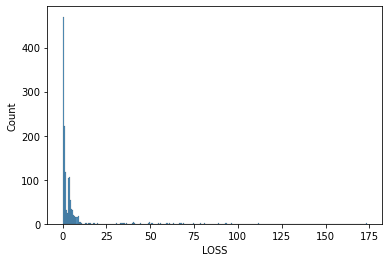

In [18]:
sns.histplot(df['LOSS'])

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOSS'>

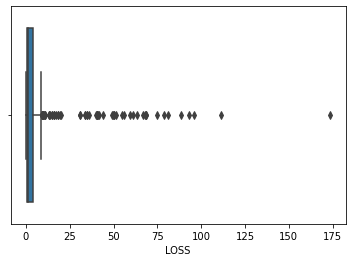

In [19]:
sns.boxplot(df['LOSS'])

In [26]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2) # This will show correlation between all columns in df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
CASENUM,1.00,0.01,0.03,0.05,-0.01,-0.00,-0.05
ATTORNEY,0.01,1.00,0.08,0.08,-0.06,0.01,-0.22
CLMSEX,0.03,0.08,1.00,0.07,-0.02,-0.02,-0.03
CLMINSUR,0.05,0.08,0.07,1.00,0.02,0.05,0.01
SEATBELT,-0.01,-0.06,-0.02,0.02,1.00,-0.03,0.11
CLMAGE,-0.00,0.01,-0.02,0.05,-0.03,1.00,0.06
LOSS,-0.05,-0.22,-0.03,0.01,0.11,0.06,1.00


'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE' columns have missing value out which - Apart from Age all others have 1 or 0 values

We will impute these values based on mode and for Age we will use Mean and Median method

In [28]:
from sklearn.impute import SimpleImputer # Calling our SimpleImputer function

In [29]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Since it is Mode so we are using most frequency
df['CLMSEX'] = pd.DataFrame(mode_imputer.fit_transform(df[['CLMSEX']])) # Assining it to our CLMSEX column
df.isnull().sum() # All Nan values are replaced with mode of the data

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

We will continue with Mode imputer for CLIMSUR and SEATBELT column

In [33]:
df['CLMINSUR'] = pd.DataFrame(mode_imputer.fit_transform(df[['CLMINSUR']]))
df['SEATBELT'] = pd.DataFrame(mode_imputer.fit_transform(df[['SEATBELT']]))
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

With Mode Imputation we have replaced all missing values with the mode of the column

For CLMAGE we will use two method, one is mean and another is median

In [36]:
df['CLMAGE'].describe() # The difference between Mean and Median is of 2 years let see if this column has any outliers

count    1151.000000
mean       28.414422
std        20.304451
min         0.000000
25%         9.000000
50%        30.000000
75%        43.000000
max        95.000000
Name: CLMAGE, dtype: float64

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLMAGE'>

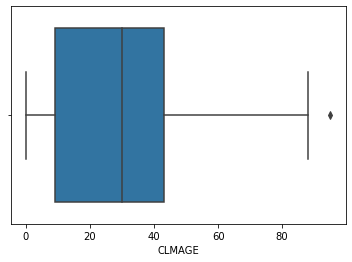

In [37]:
sns.boxplot(df['CLMAGE'])

There is atleast one value which is outlier, lets see at which Index this value is located in our dataset

In [43]:
Maxcolumn = df[df['CLMAGE']==95]

In [44]:
Maxcolumn

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
635,6585,0,0.0,1.0,0.0,95.0,0.08


The max value is at 635 Index, lets see if we can drop this index

In [46]:
data = df.drop(index=635)

In [47]:
data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [48]:
data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.00000,1150.000000,1339.000000
mean,11205.449589,0.489171,0.563107,0.910381,0.01643,28.356522,3.809090
std,9515.467232,0.500069,0.496187,0.285742,0.12717,20.217999,10.640389
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4175.000000,0.000000,0.000000,1.000000,0.00000,9.000000,0.400500
50%,8765.000000,0.000000,1.000000,1.000000,0.00000,30.000000,1.070000
75%,15712.000000,1.000000,1.000000,1.000000,0.00000,43.000000,3.783000
max,34153.000000,1.000000,1.000000,1.000000,1.00000,88.000000,173.604000


C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLMAGE'>

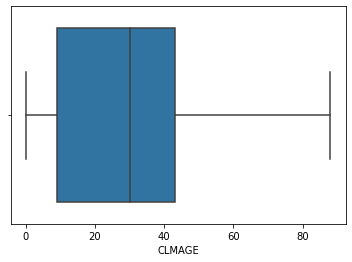

In [49]:
sns.boxplot(data['CLMAGE'])

We removed the outlier however it did not changed much. So we will continue using our old dataframe for Mean and Median Imputer

In [50]:
data1 = df.copy() # Copying our dataframe to new dataframe

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # using strategy as Mean for mean imputation
data1['CLMAGE'] = mean_imputer.fit_transform(data1[['CLMAGE']]) # Applying the imputer on our column
print(data1.isnull().sum()) # checking for any null value
print(data1.describe()) # checking the describe option

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64
            CASENUM     ATTORNEY       CLMSEX     CLMINSUR     SEATBELT  \
count   1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean   11202.001493     0.488806     0.562687     0.910448     0.016418   
std     9512.750796     0.500061     0.496240     0.285646     0.127124   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     4177.000000     0.000000     0.000000     1.000000     0.000000   
50%     8756.500000     0.000000     1.000000     1.000000     0.000000   
75%    15702.500000     1.000000     1.000000     1.000000     0.000000   
max    34153.000000     1.000000     1.000000     1.000000     1.000000   

            CLMAGE         LOSS  
count  1340.000000  1340.000000  
mean     28.414422     3.806307  
std      18.816978    10.636903  
min       0.000000     0.000000  
25%      10.000000     0.400000  
50%      

In [52]:
data2 = df.copy()

median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data2['CLMAGE'] = median_imputer.fit_transform(data2[['CLMAGE']])
print(data2.isnull().sum())
print(data2.describe())

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64
            CASENUM     ATTORNEY       CLMSEX     CLMINSUR     SEATBELT  \
count   1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean   11202.001493     0.488806     0.562687     0.910448     0.016418   
std     9512.750796     0.500061     0.496240     0.285646     0.127124   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     4177.000000     0.000000     0.000000     1.000000     0.000000   
50%     8756.500000     0.000000     1.000000     1.000000     0.000000   
75%    15702.500000     1.000000     1.000000     1.000000     0.000000   
max    34153.000000     1.000000     1.000000     1.000000     1.000000   

            CLMAGE         LOSS  
count  1340.000000  1340.000000  
mean     28.638060     3.806307  
std      18.825075    10.636903  
min       0.000000     0.000000  
25%      10.000000     0.400000  
50%      

As we can see when we did Mean Impute the Median value and Mean value became same, whereas with Median Impute mean and Median remained same